In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from seminartools.models.four_quarter_average_model import FourQuarterAverageModel
from seminartools.data import read_merged
from seminartools.data import read_inflation

# 1. Read data

In [3]:
df = read_merged().reset_index()
df

,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
2167,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
2168,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183
2169,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [4]:
df.pivot(index="date", columns="country", values="inflation")

country,Australia,Belgium,Canada,Denmark,France,Germany,Italy,Japan,Korea,Netherlands,New Zealand,Norway,Portugal,South Africa,Spain,Sweden,Switzerland,Türkiye,United Kingdom,United States
date,,,,,,,,,,,,,,,,,,,,
1977-01-01,NaN,NaN,0.023904,NaN,NaN,NaN,NaN,0.022951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017231
1977-04-01,NaN,NaN,0.023346,NaN,NaN,NaN,NaN,0.027244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.022022
1977-07-01,NaN,NaN,0.022814,NaN,NaN,NaN,NaN,0.003120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014364
1977-10-01,NaN,NaN,0.018587,NaN,NaN,NaN,NaN,0.010886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010893
1978-01-01,NaN,NaN,0.021898,NaN,NaN,NaN,NaN,0.004615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.017241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,0.021295,0.033275,0.020211,0.021536,0.014870,0.018498,0.030160,0.006876,0.015388,0.029173,0.017820,0.007055,0.015094,0.014892,0.020852,0.016158,0.007859,NaN,NaN,0.022835
2022-04-01,0.017376,0.016949,0.031008,0.032997,0.022894,0.028500,0.018298,0.009756,0.020818,0.024764,0.016643,0.024113,0.050186,0.023478,0.032860,0.032686,0.015595,NaN,NaN,0.029738
2022-07-01,0.017933,0.025000,0.008354,0.023957,0.011638,0.016134,0.021563,0.010628,0.011352,0.040519,0.021527,0.022995,0.010619,0.027957,0.012038,0.030796,0.006718,NaN,NaN,0.013147


# 2. AR model per country

In [5]:
model = FourQuarterAverageModel()
model

In [6]:
from warnings import filterwarnings

filterwarnings("ignore")
model.fit(df)

# 4. H-period ahead forecasting

In [7]:
from seminartools.models.utils import h_period_ahead_forecast

forecast = h_period_ahead_forecast(model, df, "2020-01-01", h=1)
forecast

,date,country,inflation
0,2020-01-01,Australia,0.004455
1,2020-01-01,Belgium,0.001163
2,2020-01-01,Canada,0.005183
3,2020-01-01,Denmark,0.001706
4,2020-01-01,France,0.002897
...,...,...,...
255,2023-01-01,Sweden,0.027675
256,2023-01-01,Switzerland,0.007345
257,2023-01-01,Türkiye,NaN
258,2023-01-01,United Kingdom,NaN


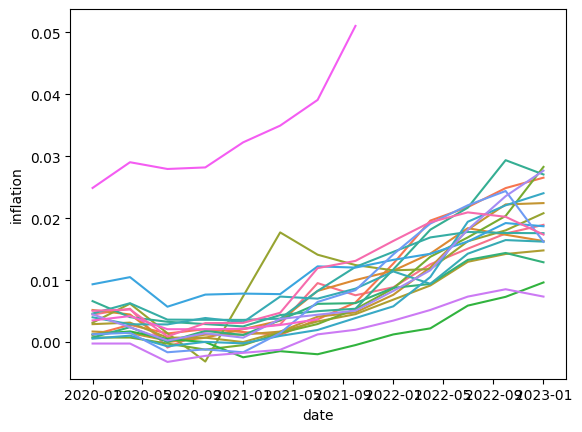

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=forecast, x="date", y="inflation", hue="country")
# turn off legend
plt.legend().remove()

In [9]:
df

,country,date,inflation,gdp_growth,interest_rate,unemployment_rate,commodity_CRUDE_PETRO,commodity_iNATGAS,commodity_iAGRICULTURE,commodity_iMETMIN,commodity_iPRECIOUSMET
0,Japan,1977-01-01,0.022951,2.187257,6.333333,2.3,0.00000,0.052425,0.144757,0.041940,0.112740
1,Canada,1977-01-01,0.023904,1.533830,8.166667,8.8,0.00000,0.052425,0.144757,0.041940,0.112740
2,United States,1977-01-01,0.017231,1.186233,4.700000,8.2,0.00000,0.052425,0.144757,0.041940,0.112740
3,Japan,1977-04-01,0.027244,0.703788,5.000000,2.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
4,Canada,1977-04-01,0.023346,0.510302,7.666667,8.0,-0.00400,0.043586,-0.066688,-0.045412,-0.060029
...,...,...,...,...,...,...,...,...,...,...,...
2166,Italy,2023-01-01,0.003938,0.552944,3.000000,8.3,-0.02041,-0.585458,0.002037,0.007418,0.043183
2167,Canada,2023-01-01,0.006080,0.610026,4.500000,5.4,-0.02041,-0.585458,0.002037,0.007418,0.043183
2168,Sweden,2023-01-01,0.014955,0.656897,2.833333,7.8,-0.02041,-0.585458,0.002037,0.007418,0.043183
2169,Korea,2023-01-01,0.010538,0.329875,3.500000,3.2,-0.02041,-0.585458,0.002037,0.007418,0.043183


In [10]:
forecast

,date,country,inflation
0,2020-01-01,Australia,0.004455
1,2020-01-01,Belgium,0.001163
2,2020-01-01,Canada,0.005183
3,2020-01-01,Denmark,0.001706
4,2020-01-01,France,0.002897
...,...,...,...
255,2023-01-01,Sweden,0.027675
256,2023-01-01,Switzerland,0.007345
257,2023-01-01,Türkiye,NaN
258,2023-01-01,United Kingdom,NaN


In [11]:
forecast_merged = forecast.copy().rename(
    columns={"inflation": "pred"}
).merge(
    df[["country", "date", "inflation"]],
    on=["country", "date"],
    how="left",
).rename(columns={"inflation": "actual"})
forecast_merged.tail(100)

,date,country,pred,actual
160,2022-01-01,Australia,0.008847,0.021295
161,2022-01-01,Belgium,0.012674,0.033275
162,2022-01-01,Canada,0.011531,0.020211
163,2022-01-01,Denmark,0.007637,0.021536
164,2022-01-01,France,0.006854,0.014870
...,...,...,...,...
255,2023-01-01,Sweden,0.027675,0.014955
256,2023-01-01,Switzerland,0.007345,0.010084
257,2023-01-01,Türkiye,NaN,NaN
258,2023-01-01,United Kingdom,NaN,NaN


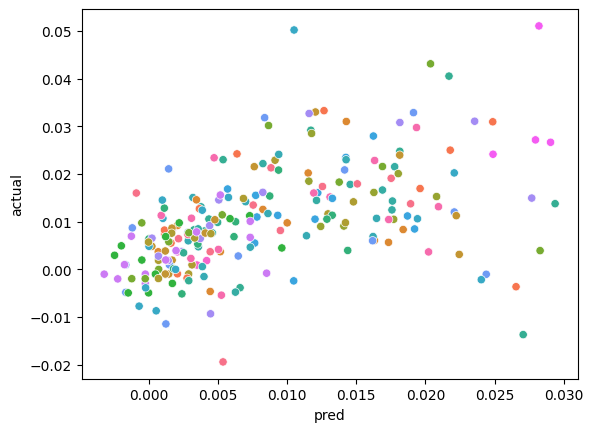

In [12]:
sns.scatterplot(data=forecast_merged, x="pred", y="actual", hue="country")
plt.legend().remove()

In [13]:
import statsmodels.api as sm

sm.OLS(
    forecast_merged["actual"], sm.add_constant(forecast_merged["pred"]), missing="drop"
).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 actual   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     79.93
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           1.20e-16
Time:                        16:40:25   Log-Likelihood:                 768.80
No. Observations:                 236   AIC:                            -1534.
Df Residuals:                     234   BIC:                            -1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0044      0.001      4.993      0.000       0.003       0.006
pred           0.6906      0.077      8.940      0.000       0.538       0.843
==============================================================================
Omnibus:                       16.994   Durbin-Watson:                   1.405
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.540
Skew:                           0.143   Prob(JB):                     1.75e-11
Kurtosis:                       5.226   Cond. No.                         127.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# expanding window crossval
from seminartools.time_series_split import ExpandingWindowSplit

tss = ExpandingWindowSplit(start_date = "2000-01-01")
tss

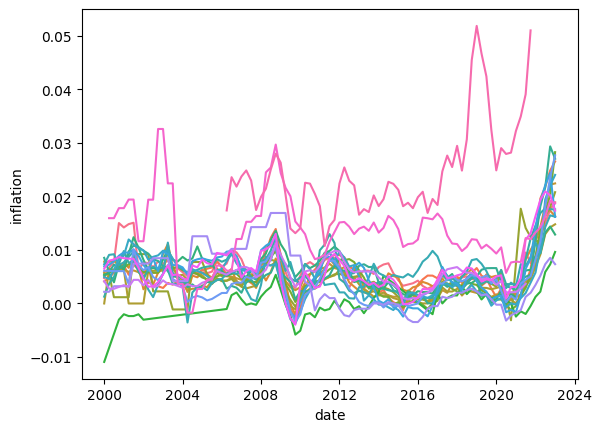

In [15]:
from seminartools.models.utils import make_oos_predictions

sns.lineplot(
    data = make_oos_predictions(model, df, tss),
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# ARMAX

In [16]:
from seminartools.models.armax_model import ARMAXModel
preds = make_oos_predictions(ARMAXModel(max_p = 2, max_q = 2), df, tss, progress = True, num_cores = 5)
preds

Splits: 100%|██████████| 5/5 [00:00<00:00, 132.41it/s]
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/maurits/miniconda3/envs/develop/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings

,date,country,inflation
0,1999-04-01,Japan,0.004849
1,2000-01-01,Canada,0.005820
2,2000-01-01,United States,0.009048
3,2000-01-01,Australia,0.007048
4,2000-01-01,New Zealand,0.003326
...,...,...,...
1799,2023-01-01,Norway,-0.004244
1800,2023-01-01,Belgium,0.011175
1801,2023-01-01,Korea,0.007835
1802,2023-01-01,South Africa,0.010410


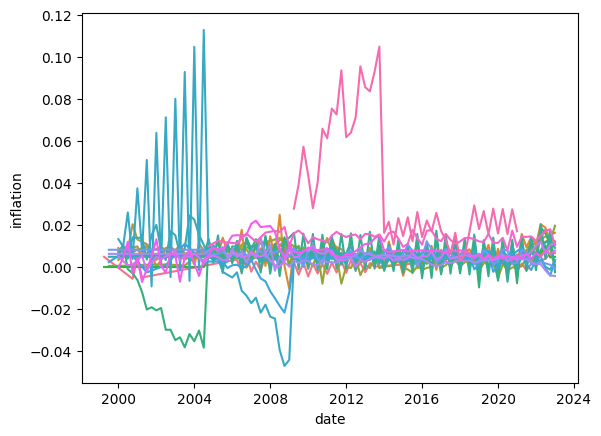

In [17]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# PCA VAR

In [18]:
from seminartools.models.pca_var_model import PCAVARModel
preds = make_oos_predictions(PCAVARModel(), df, tss, progress = True, num_cores = 1)
preds

Splits:  20%|██        | 1/5 [00:00<00:00,  4.10it/s]

          date         country  inflation
0   2000-01-01       Australia   0.004676
1   2000-01-01         Belgium  -0.000205
2   2000-01-01          Canada  -0.003708
3   2000-01-01         Denmark  -0.001454
4   2000-01-01          France  -0.000054
..         ...             ...        ...
337 2004-07-01           Spain  -0.001026
338 2004-07-01          Sweden  -0.000532
339 2004-07-01     Switzerland  -0.000121
340 2004-07-01  United Kingdom   0.003977
341 2004-07-01   United States   0.002569

[342 rows x 3 columns]


Splits:  40%|████      | 2/5 [00:00<00:00,  4.27it/s]

          date         country  inflation
0   2004-10-01       Australia  -0.000853
1   2004-10-01         Belgium   0.003007
2   2004-10-01          Canada   0.005480
3   2004-10-01         Denmark   0.004204
4   2004-10-01          France   0.002995
..         ...             ...        ...
337 2009-01-01           Spain   0.003907
338 2009-01-01          Sweden   0.004373
339 2009-01-01     Switzerland   0.001751
340 2009-01-01  United Kingdom   0.000594
341 2009-01-01   United States   0.000693

[342 rows x 3 columns]


Splits:  60%|██████    | 3/5 [00:00<00:00,  4.23it/s]

          date         country  inflation
0   2009-04-01       Australia   0.004871
1   2009-04-01         Belgium   0.006319
2   2009-04-01          Canada   0.007562
3   2009-04-01         Denmark   0.007700
4   2009-04-01          France   0.007574
..         ...             ...        ...
375 2013-10-01          Sweden   0.009484
376 2013-10-01     Switzerland   0.001475
377 2013-10-01         Türkiye   0.016233
378 2013-10-01  United Kingdom   0.006183
379 2013-10-01   United States   0.002994

[380 rows x 3 columns]


Splits:  80%|████████  | 4/5 [00:00<00:00,  4.25it/s]

          date         country  inflation
0   2014-01-01       Australia   0.003648
1   2014-01-01         Belgium   0.001343
2   2014-01-01          Canada   0.003928
3   2014-01-01         Denmark   0.000879
4   2014-01-01          France   0.001729
..         ...             ...        ...
355 2018-04-01          Sweden   0.009374
356 2018-04-01     Switzerland   0.010592
357 2018-04-01         Türkiye   0.023625
358 2018-04-01  United Kingdom   0.005701
359 2018-04-01   United States   0.006971

[360 rows x 3 columns]


Splits: 100%|██████████| 5/5 [00:01<00:00,  4.19it/s]

          date         country  inflation
0   2018-07-01       Australia   0.007453
1   2018-07-01         Belgium   0.002223
2   2018-07-01          Canada   0.008167
3   2018-07-01         Denmark   0.000413
4   2018-07-01          France   0.001058
..         ...             ...        ...
375 2023-01-01          Sweden   0.011736
376 2023-01-01     Switzerland   0.012828
377 2023-01-01         Türkiye   0.044421
378 2023-01-01  United Kingdom   0.007336
379 2023-01-01   United States   0.015746

[380 rows x 3 columns]


,date,country,inflation
0,2000-01-01,Australia,0.004676
1,2000-01-01,Belgium,-0.000205
2,2000-01-01,Canada,-0.003708
3,2000-01-01,Denmark,-0.001454
4,2000-01-01,France,-0.000054
...,...,...,...
1799,2023-01-01,Sweden,0.011736
1800,2023-01-01,Switzerland,0.012828
1801,2023-01-01,Türkiye,0.044421
1802,2023-01-01,United Kingdom,0.007336


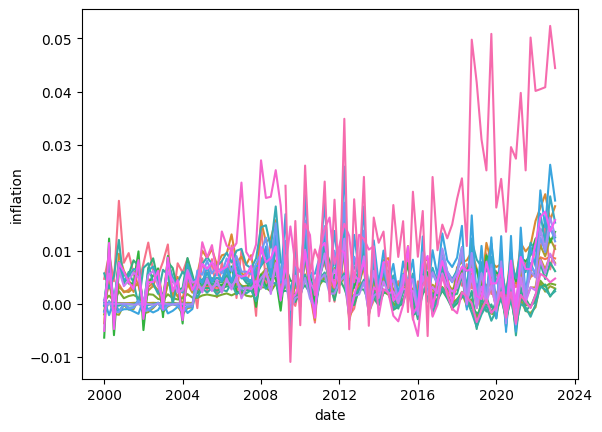

In [19]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# UCSVSS

In [20]:
from seminartools.models.uc_sv_ss_model import UCSVSSModel

preds = make_oos_predictions(
    UCSVSSModel(num_particles=10000, stochastic_seasonality=True),
    df,
    tss,
    progress=True,
    num_cores=1,
)
preds

Splits:   0%|          | 0/5 [00:00<?, ?it/s]

Fitting model on the full dataset...


100%|██████████| 20/20 [00:00<00:00, 66.86it/s]


Fitted!
     inflation        country       date
0     0.007544          Japan 1999-04-01
1     0.006238         Canada 2000-01-01
2     0.006050  United States 2000-01-01
3     0.003940      Australia 2000-01-01
4     0.000722    New Zealand 2000-01-01
..         ...            ...        ...
355   0.000058    Netherlands 2004-07-01
356  -0.001963         Norway 2004-07-01
357   0.002982        Belgium 2004-07-01
358   0.003878          Korea 2004-07-01
359   0.011226   South Africa 2004-04-01

[360 rows x 3 columns]


Splits:  40%|████      | 2/5 [00:31<00:38, 12.91s/it]

     inflation        country       date
0    -0.004572          Japan 2001-04-01
1     0.002931         Canada 2004-10-01
2     0.003709  United States 2004-10-01
3     0.006618      Australia 2004-10-01
4     0.006415    New Zealand 2004-10-01
..         ...            ...        ...
349   0.006453         Norway 2009-01-01
350   0.003722        Belgium 2009-01-01
351   0.010958          Korea 2009-01-01
352   0.021559   South Africa 2009-01-01
353   0.021535        Türkiye 2009-01-01

[354 rows x 3 columns]


Splits:  60%|██████    | 3/5 [00:31<00:14,  7.11s/it]

     inflation        country       date
0     0.006468          Japan 2009-04-01
1     0.007858         Canada 2009-04-01
2     0.009518  United States 2009-04-01
3     0.006084      Australia 2009-04-01
4     0.008701    New Zealand 2009-04-01
..         ...            ...        ...
375   0.008547         Norway 2013-10-01
376   0.000081        Belgium 2013-10-01
377  -0.000063          Korea 2013-10-01
378   0.010706   South Africa 2013-10-01
379   0.031565        Türkiye 2013-10-01

[380 rows x 3 columns]


Splits:  80%|████████  | 4/5 [00:31<00:04,  4.39s/it]

     inflation        country       date
0    -0.002465          Japan 2013-07-01
1     0.004079         Canada 2014-01-01
2     0.005643  United States 2014-01-01
3     0.007730      Australia 2014-01-01
4     0.003116    New Zealand 2014-01-01
..         ...            ...        ...
355   0.007163         Norway 2018-04-01
356   0.006348        Belgium 2018-04-01
357   0.002222          Korea 2018-04-01
358   0.015366   South Africa 2018-04-01
359   0.021782        Türkiye 2018-04-01

[360 rows x 3 columns]


Splits: 100%|██████████| 5/5 [00:31<00:00,  6.39s/it]

     inflation        country       date
0    -0.002293          Japan 2018-07-01
1     0.001916         Canada 2018-07-01
2     0.004003  United States 2018-07-01
3     0.006332      Australia 2018-07-01
4     0.004704    New Zealand 2018-07-01
..         ...            ...        ...
375   0.008652         Norway 2023-01-01
376   0.031226        Belgium 2023-01-01
377   0.012874          Korea 2023-01-01
378   0.016234   South Africa 2023-01-01
379   0.031532        Türkiye 2021-01-01

[380 rows x 3 columns]


,inflation,country,date
0,0.007544,Japan,1999-04-01
1,0.006238,Canada,2000-01-01
2,0.006050,United States,2000-01-01
3,0.003940,Australia,2000-01-01
4,0.000722,New Zealand,2000-01-01
...,...,...,...
1829,0.008652,Norway,2023-01-01
1830,0.031226,Belgium,2023-01-01
1831,0.012874,Korea,2023-01-01
1832,0.016234,South Africa,2023-01-01


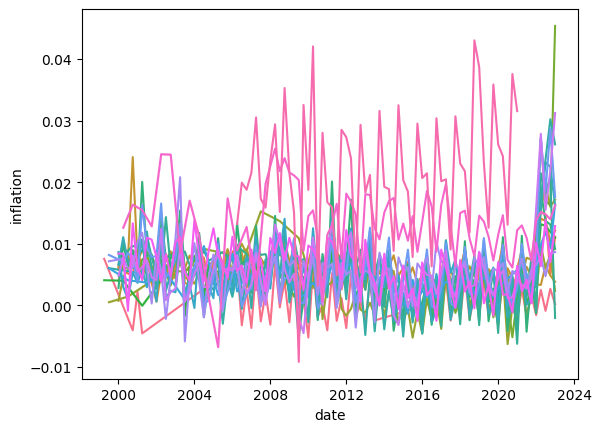

In [21]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# RE model

In [22]:
from seminartools.models.random_effects_model import RandomEffectsModel

preds = make_oos_predictions(
    RandomEffectsModel(),
    df,
    tss,
    progress=True,
    num_cores=5,
)
preds

Splits: 100%|██████████| 5/5 [00:00<00:00, 11.66it/s]


          date         country  inflation6660/8000 00:01<00:00  Chains in warmup: 0, Divergences: 4]
0   2000-01-01       Australia   0.010255
1   2000-01-01         Belgium   0.003263
2   2000-01-01          Canada   0.008065
3   2000-01-01         Denmark   0.006627
4   2000-01-01           Italy   0.004136
..         ...             ...        ...
258 2004-07-01        Portugal   0.004615
259 2004-07-01           Spain   0.003190
260 2004-07-01          Sweden   0.003643
261 2004-07-01  United Kingdom   0.001724
262 2004-07-01   United States   0.008199

[263 rows x 3 columns]
          date         country  inflation000/8000 00:04<00:00  Chains in warmup: 0, Divergences: 11]
0   2004-10-01       Australia   0.006462
1   2004-10-01         Belgium   0.003847
2   2004-10-01          Canada   0.007476
3   2004-10-01         Denmark   0.004283
4   2004-10-01          France   0.003712
..         ...             ...        ...
305 2009-01-01           Spain   0.007297
306 2009-01-01    

,date,country,inflation
0,2000-01-01,Australia,0.010255
1,2000-01-01,Belgium,0.003263
2,2000-01-01,Canada,0.008065
3,2000-01-01,Denmark,0.006627
4,2000-01-01,Italy,0.004136
...,...,...,...
1648,2023-01-01,South Africa,0.013169
1649,2023-01-01,Spain,-0.008979
1650,2023-01-01,Sweden,-0.006145
1651,2023-01-01,Switzerland,-0.004780


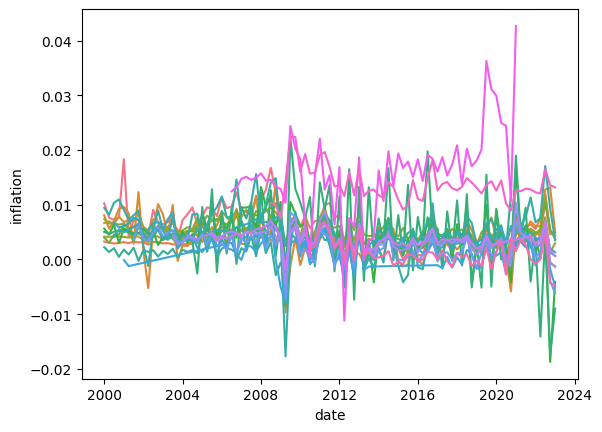

In [23]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()

# Distance based model

In [19]:
from seminartools.models.distance_model import DistanceModel

preds = make_oos_predictions(
    DistanceModel(),
    df,
    tss,
    progress=True,
    num_cores=1,
)
preds

Creating regression coefficients: 100%|██████████| 8/8 [00:09<00:00,  1.17s/it]


country_indices=array([ 3, 16,  1, 11,  6, 17,  4,  8,  9, 12,  2])
country_indices=array([ 3, 16,  1, 11,  6, 17,  4,  8,  9, 12,  2])
country_indices=array([ 3, 16,  1, 11,  6, 17, 14,  4, 15,  8,  9, 12,  2])
country_indices=array([ 3, 16,  1, 11,  6, 17, 14,  4, 15,  8,  9, 12,  2])
country_indices=array([ 3, 16,  1, 11,  6,  0, 17, 14,  4, 15,  8,  9, 12,  2])
country_indices=array([ 3, 16,  1, 11,  6,  0, 17, 14,  4, 15,  8,  9, 12,  2])
country_indices=array([ 3, 16,  1, 11,  6, 17, 14,  4, 15,  8,  9, 10, 12,  2])
country_indices=array([ 3, 16,  1, 11,  6, 17, 14,  4, 15,  8,  9, 10, 12,  2])
country_indices=array([ 3, 16,  1, 11,  6, 17, 14,  4, 15,  8,  9, 10, 12,  2])
country_indices=array([ 3, 16,  1, 11,  6, 17, 14,  4, 15,  8,  9, 10, 12,  2])
country_indices=array([ 3, 16,  1, 11,  6, 17, 14,  4, 15,  8,  9, 10, 12,  2])
country_indices=array([ 3, 16,  1, 11,  6, 17, 14,  4, 15,  8,  9, 10, 12,  2])
country_indices=array([ 3, 16,  1, 11,  6, 17, 14,  4, 15,  8,  9, 10, 1

Splits:  20%|██        | 1/5 [02:28<09:52, 148.23s/it]

country_indices=array([ 3, 16,  1, 11,  7,  6, 17, 14,  4, 15,  8,  9, 10, 12,  2])
country_indices=array([ 3, 16,  1, 11,  7,  6, 17, 14,  4, 15,  8,  9, 10, 12,  2])
country_indices=array([ 3, 16,  1, 11,  7,  6, 17, 14,  4, 15,  8,  9, 10, 12,  2])


Creating regression coefficients: 100%|██████████| 8/8 [00:10<00:00,  1.29s/it]


country_indices=array([ 3, 16,  1, 11,  7,  6, 17, 14,  4, 15,  8,  9, 10, 12,  2])
country_indices=array([ 3, 16,  1, 11,  7,  6, 17, 14,  4, 15,  8,  9, 10, 12,  2])
country_indices=array([ 3, 16,  1, 11,  7,  6, 17, 14,  4, 15,  8,  9, 10, 12,  2])
country_indices=array([ 3, 16,  1, 11,  7, 13,  6, 17, 14,  4, 15,  8,  9, 10, 12,  2])
country_indices=array([ 3, 16,  1, 11,  7, 13,  6, 17, 14,  4, 15,  8,  9, 10, 12,  2])
country_indices=array([ 3, 16,  1, 11,  7, 13,  6, 17, 14,  4, 15,  8,  9, 10, 12,  2])
country_indices=array([ 3, 16,  1, 11,  7, 13,  6, 17, 14,  4, 15,  8,  9, 10, 12,  2])
country_indices=array([ 3., 16.,  1., 11.,  7., 13.,  6.,  0., 17., 14.,  4., 15.,  8.,
        9., 10., nan, 12.,  2.])


IndexError: arrays used as indices must be of integer (or boolean) type

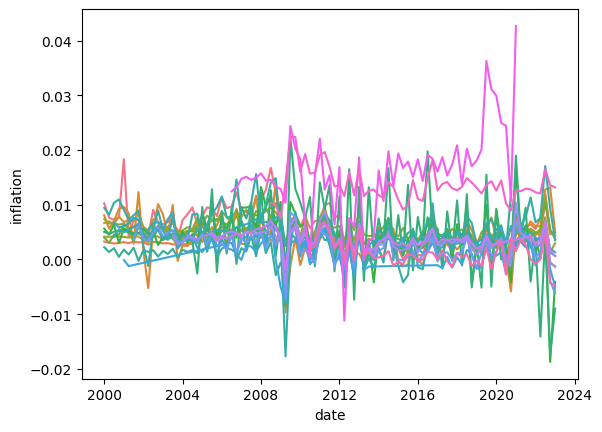

In [ ]:
sns.lineplot(
    data = preds,
    x = "date",
    y = "inflation",
    hue = "country"
)

plt.legend().remove()